In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.6 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=a5e40333a529a55123f9cd9fe4ae3b350e5b29f437a75ae2aedb4c53a6b1d2dc
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11335 sha256=f73dc6b126301d0b34a7ca8c17e83e23aefd6941e39f4907feb899e6b9a899ac
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer
import seaborn as sns
import datetime as dt
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

Clearly, thoroughly addresses ALL FOUR of the following:
1. Data sources.
2. High-level summary of predictors in raw data sets and the response(s) to be predicted.
3. Any pre-processing used to transform raw data sets for use in predictive modeling. Includes but not restricted to Box-Cox, centering, scaling, removal of near zero variance predictors, bad entries, missing values.
4. Provide a high-level summary of the final cleaned-up data used in predictive analysis (predictors and responses).

In [ ]:
proteins = pd.read_csv('train_proteins.csv')
peptides = pd.read_csv('train_peptides.csv')
clinical = pd.read_csv('train_clinical_data.csv')

FileNotFoundError: ignored



##Updated Merge/Pivot

In [ ]:
protein_g = proteins.groupby(['visit_id','UniProt']).mean().reset_index().pivot(index='visit_id',columns='UniProt',values='NPX')

In [ ]:
protein_g.head()

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,O75144,O75326,O94919,P00441,P00450,P00734,P00736,P00738,P00746,P00747,P00748,P00751,P01008,P01009,P01011,P01019,P01023,P01024,P01031,P01033,P01034,P01042,P01344,P01591,P01594,P01608,P01621,P01717,P01780,P01833,P01834,P01857,P01859,P01860,P01861,P01876,P01877,P02452,P02647,P02649,...,Q08380,Q12805,Q12841,Q12907,Q13283,Q13332,Q13449,Q13451,Q13740,Q14118,Q14508,Q14515,Q14624,Q15904,Q16270,Q16610,Q562R1,Q6UX71,Q6UXB8,Q6UXD5,Q7Z3B1,Q7Z5P9,Q8IWV7,Q8N2S1,Q8NBJ4,Q8NE71,Q92520,Q92823,Q92876,Q96BZ4,Q96KN2,Q96PD5,Q96S96,Q99435,Q99674,Q99683,Q99829,Q99832,Q99969,Q9BY67,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
visit_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10053_0,9104.27,402321.0,NaN,NaN,7150.57,2497.84,83002.9,15113.6,167327.0,129048.0,53069.5,NaN,11074.6,NaN,774736.0,474672.0,NaN,3594820.0,34217.2,365510.0,28713.8,475601.0,1849090.0,12825300.0,1084770.0,1197290.0,1005230.0,2669740.0,NaN,79917.7,18811700.0,541909.0,120502.0,8277.92,NaN,8776.14,196510.0,88369.3,12877.0,NaN,2440800.0,3750260.0,2238830.0,49324.7,83537.6,1874270.0,75415.7,18309.7,4032650.0,5158030.0,...,149335.0,1051980.0,NaN,NaN,601414.0,14652.2,NaN,1327970.0,NaN,170379.0,NaN,152279.0,108267.0,16300.5,604267.0,111392.0,17045.9,NaN,4030.33,NaN,43339.3,340144.0,136462.0,NaN,17687.6,NaN,322496.0,131048.0,847666.0,NaN,547193.0,98491.2,27399.8,NaN,16961.9,NaN,NaN,NaN,NaN,NaN,NaN,9469.45,94237.6,NaN,23016.0,177983.0,65900.0,15382.0,NaN,19017.40
10053_12,10464.20,435586.0,NaN,NaN,NaN,NaN,197117.0,15099.1,164268.0,108114.0,55856.4,NaN,44516.3,NaN,1025080.0,391328.0,NaN,1992590.0,119396.0,365969.0,23347.6,406037.0,1769370.0,11871200.0,1135570.0,1178170.0,1230990.0,3360790.0,NaN,78499.7,19343900.0,584371.0,76739.9,7124.72,14098.50,7592.37,185831.0,85195.6,5802.1,1860110.0,2030500.0,4872420.0,2165970.0,131029.0,178106.0,1800070.0,11026.3,30729.5,5111760.0,5201730.0,...,152649.0,738247.0,NaN,23592.6,521313.0,16481.9,NaN,951426.0,NaN,117830.0,NaN,133566.0,113571.0,24835.9,727391.0,115735.0,16914.9,NaN,33836.80,15401.5,51576.8,454133.0,81096.2,NaN,24351.9,NaN,496976.0,159983.0,809632.0,NaN,621740.0,102899.0,37814.1,NaN,21530.6,109882.0,NaN,NaN,NaN,16311.6,NaN,14408.40,NaN,NaN,28537.0,171733.0,65668.1,NaN,9295.65,25697.80
10053_18,13235.70,507386.0,7126.96,24525.7,NaN,2372.71,126506.0,16289.6,168107.0,163776.0,74672.3,NaN,57117.2,53157.9,1104540.0,491425.0,75603.2,2683290.0,57081.2,309751.0,89467.3,523401.0,2821870.0,14319900.0,1444430.0,1597540.0,1333940.0,3728860.0,7907.66,87682.5,18772400.0,971184.0,94953.3,10847.80,13656.10,14548.20,89982.2,87116.5,18800.8,3372600.0,2106740.0,4331390.0,1420530.0,1191760.0,150159.0,1508300.0,92023.6,60339.2,5713180.0,8381290.0,...,215975.0,843926.0,18702.7,33175.3,568842.0,19527.3,35984.7,5313140.0,NaN,146885.0,6899.47,319811.0,126003.0,23158.8,516536.0,168663.0,19680.9,9982.90,36980.20,29798.3,69825.6,491966.0,116437.0,NaN,22714.5,13267.4,674551.0,160120.0,1119040.0,NaN,669711.0,104428.0,44725.0,1334.11,22066.7,105470.0,19092.7,30619.4,NaN,26687.2,317477.0,38667.20,111107.0,NaN,37932.6,245188.0,59986.1,10813.3,NaN,29102.70
10138_12,12600.20,494581.0,9165.06,27193.5,22506.10,6015.90,156313.0,54546.4,204013.0,56725.0,62369.7,8008.41,29401.2,43100.8,1116740.0,996035.0,71763.9,2170220.0,112861.0,481992.0,71270.2,713993.0,3265820.0,11024900.0,1725440.0,1971000.0,1302590.0,4276570.0,18786.40,86710.8,19010200.0,1627070.0,101591.0,12807.20,17559.00,25025.40,164879.0,163960.0,18861.9,NaN,4071840.0,6921380.0,3399840.0,967013.0,89678.0,5456100.0,139666.0,42239.7,22825800.0,12307400.0,...,230173.0,816347.0,22706.8,33162.7,519775.0,18618.9,NaN,3898800.0,17489.3,129327.0,5191.39,429275.0,152383.0,42681.4,1066950.0,155690.0,NaN,12708.50,39689.50,24360.9,65222.9,508437.0,168312.0,8540.88,23667.5,22650.8,601869.0,163039.0,1046560.0,6910.25,682593.0,134432.0,30028.5,2520.24,NaN,81359.1,17980.1,66959.6,

In [ ]:
peptides_g = peptides.groupby(['visit_id','Peptide']).mean().reset_index().pivot(index='visit_id',columns='Peptide',values='PeptideAbundance')

In [ ]:
df = clinical.merge(protein_g.merge(peptides_g,on='visit_id'),on='visit_id')
df.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,O75144,O75326,O94919,P00441,P00450,P00734,P00736,P00738,P00746,P00747,P00748,P00751,P01008,P01009,P01011,P01019,P01023,P01024,P01031,P01033,P01034,P01042,P01344,P01591,P01594,P01608,P01621,P01717,P01780,P01833,P01834,P01857,...,VTTVASHTSDSDVPSGVTEVVVK,VVEESELAR,VVEQMC(UniMod_4)ITQYER,VVVNFAPTIQEIK,VYAC(UniMod_4)EVTHQGLSSPVTK,VYC(UniMod_4)DMNTENGGWTVIQNR,VYTVDLGR,WC(UniMod_4)AVSEHEATK,WEAEPVYVQR,WELALGR,WGYC(UniMod_4)LEPK,WKNFPSPVDAAFR,WLPSSSPVTGYR,WQEEMELYR,WSGQTAIC(UniMod_4)DNGAGYC(UniMod_4)SNPGIPIGTR,WSRPQAPITGYR,WSSTSPHRPR,WYEIEKIPTTFENGR,WYFDVTEGK,YAMVYGYNAAYNR,YANC(UniMod_4)HLAR,YFIDFVAR,YGFIEGHVVIPR,YGLDSDLSC(UniMod_4)K,YGLVTYATYPK,YGQTIRPIC(UniMod_4)LPC(UniMod_4)TEGTTR,YHDRDVWKPEPC(UniMod_4)R,YIETDPANR,YIFHNFMER,YIVSGTPTFVPYLIK,YKAAFTEC(UniMod_4)C(UniMod_4)QAADK,YLFLNGNK,YLGEEYVK,YLQEIYNSNNQK,YLYEIAR,YNSQNQSNNQFVLYR,YPGPQAEGDSEGLSQGLVDREK,YPNC(UniMod_4)AYR,YPSLSIHGIEGAFDEPGTK,YQC(UniMod_4)YC(UniMod_4)YGR,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,11254.3,732430.0,39585.8,41526.9,31238.00,4202.71,177775.0,62898.2,333376.0,166850.0,98746.3,6380.35,67567.6,64117.8,1181230.0,688909.0,109541.0,3956470.0,111619.0,347865.0,71835.4,637630.0,2676370.0,14415900.0,2025890.0,1984650.0,1953020.0,3916980.0,13033.3,117641.0,43235500.0,1221530.0,136544.0,6978.98,NaN,11386.00,126829.0,110750.0,9600.69,4950980.0,2121640.0,3521370.0,...,3545510.0,85171.7,507483.0,116200.0,950636.0,16627.1,4950980.0,1444510.0,22400.1,440819.0,26208.1,617209.0,343324.0,362896.0,14337.7,212551.0,9282.55,1345210.0,86549.8,7181.21,69423.9,152862.0,173435.0,301066.0,217503.0,157171.0,40363.4,168765.0,14447.3,8672.27,3239080.0,48049.2,1935100.0,39874.2,32113800.0,52602.8,165379.0,222353.0,94090.8,10882.70,201158.0,16492.3,3810270.0,106894.0,580667.0,131155.0,165851.0,437305.0,46289.2,14898.4
1,55_6,55,6,8.0,10.0,34.0,NaN,NaN,13163.6,630465.0,35220.8,41295.0,26219.90,4416.42,165638.0,62567.5,277833.0,170345.0,95184.0,7752.58,53314.5,66926.1,1099600.0,672751.0,105767.0,3944380.0,95825.1,364918.0,44460.6,590535.0,2788100.0,13330800.0,2060930.0,1763540.0,1742270.0,3283590.0,12149.3,128553.0,37999700.0,1045710.0,145239.0,5934.44,NaN,10502.30,137343.0,139107.0,8789.06,5479030.0,1982490.0,3506560.0,...,2911020.0,74961.7,567314.0,101777.0,964462.0,13055.0,5479030.0,1419460.0,22933.0,378242.0,NaN,693530.0,264634.0,260021.0,15069.6,170437.0,8658.59,1298050.0,76193.3,5932.20,84559.8,173264.0,166824.0,217379.0,200473.0,140839.0,40157.6,152587.0,16235.8,19835.60,3092640.0,43312.4,1992770.0,35689.0,24846400.0,56822.0,122259.0,198591.0,97250.8,8545.00,171079.0,13198.8,4119520.0,113385.0,514861.0,103512.0,144607.0,457891.0,40047.7,20703.9
2,55_12,55,12,10.0,10.0,41.0,0.0,On,15257.6,815083.0,41650.9,39763.3,30703.60,4343.60,151073.0,66963.1,332401.0,151194.0,93159.8,10047.00,63075.8,56812.2,1231050.0,677883.0,112909.0,4107440.0,127383.0,352298.0,46942.3,646876.0,2888930.0,13225500.0,2015710.0,2052090.0,2007630.0,4183310.0,14103.5,138784.0,38506400.0,1296470.0,128509.0,8085.93,NaN,8539.53,99258.6,110866.0,10916.30,5362030.0,2317080.0,4006600.0,...,3256020.0,77771.5,571323.0,112634.0,1016380.0,18267.4,5362030.0,1417560.0,20778.6,473241.0,NaN,784343.0,352509.0,261497.0,16255.1,206609.0,8688.23,1395960.0,91896.7,5659.85,90596.6,190418.0,173358.0,361074.0,193202.0,161863.0,38935.5,175439.0,16581.7,9986.78,3280360.0,43645.0,2352870.0,44984.8,31543000.0,57363.5,168067.0,213575.0,112260.0,9972.22,231772.0,17873.8,5474140.0,116286.0,711815.0,136943.0,181763.0,452253.0,54725.1,21841.1
3,55_36,55,36,17.0,18.0,51.0,0.0,On,13530.8,753832.0,43048.9,43503.6,33577.60,5367.06,101056.0,67588.6,317490.0,122902.0,96991.1,8800.86,61609.3,71016.4,1273390.0,598050.0,98673.4,4

Let's do some data cleaning and exploration

##Exploration and Cleaning / Model Preperation

In this section we will:
1. Explore the Data
2. Clean the Data
3. Split the Data
4. Impute
5. Prepare for modeling / analysis

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [ ]:
#Number of patients
len(df.patient_id.unique())

248

In [ ]:
df.isna().sum()

visit_id                   0
patient_id                 0
visit_month                0
updrs_1                    0
updrs_2                    0
                        ... 
YVNKEIQNAVNGVK             2
YWGVASFLQK                23
YYC(UniMod_4)FQGNQFLR      8
YYTYLIMNK                 80
YYWGGQYTWDMAK            237
Length: 1203, dtype: int64

In [ ]:
# Percent of data that is missing
df.isna().sum().sum()/(df.shape[0]*df.shape[1])

0.08746314612968203

There are a lot of null values...for the proteins and peptides. We will have to either impute those with the median, patient's previous value, remove, etc.  

(array([ 1., 12., 75., 67.,  0., 44., 31.,  5.,  8.,  5.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

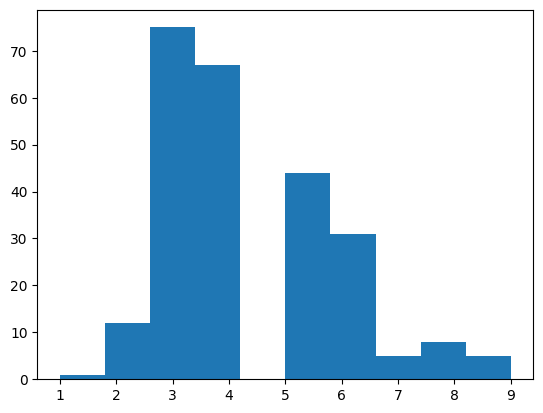

In [ ]:
#Make a histogram of how many visits each patient has
row_count = {}
for patient in df.patient_id.unique():
  row_count[patient] = len(df[df.patient_id == patient])

plt.hist(row_count.values())

It's pretty clear that the number of patient visits is all across the board. Most are in the 3-6 range, but even still it is spread out.

In [ ]:
df.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,O75144,O75326,O94919,P00441,P00450,P00734,P00736,P00738,P00746,P00747,P00748,P00751,P01008,P01009,P01011,P01019,P01023,P01024,P01031,P01033,P01034,P01042,P01344,P01591,P01594,P01608,P01621,P01717,P01780,P01833,P01834,P01857,...,VTTVASHTSDSDVPSGVTEVVVK,VVEESELAR,VVEQMC(UniMod_4)ITQYER,VVVNFAPTIQEIK,VYAC(UniMod_4)EVTHQGLSSPVTK,VYC(UniMod_4)DMNTENGGWTVIQNR,VYTVDLGR,WC(UniMod_4)AVSEHEATK,WEAEPVYVQR,WELALGR,WGYC(UniMod_4)LEPK,WKNFPSPVDAAFR,WLPSSSPVTGYR,WQEEMELYR,WSGQTAIC(UniMod_4)DNGAGYC(UniMod_4)SNPGIPIGTR,WSRPQAPITGYR,WSSTSPHRPR,WYEIEKIPTTFENGR,WYFDVTEGK,YAMVYGYNAAYNR,YANC(UniMod_4)HLAR,YFIDFVAR,YGFIEGHVVIPR,YGLDSDLSC(UniMod_4)K,YGLVTYATYPK,YGQTIRPIC(UniMod_4)LPC(UniMod_4)TEGTTR,YHDRDVWKPEPC(UniMod_4)R,YIETDPANR,YIFHNFMER,YIVSGTPTFVPYLIK,YKAAFTEC(UniMod_4)C(UniMod_4)QAADK,YLFLNGNK,YLGEEYVK,YLQEIYNSNNQK,YLYEIAR,YNSQNQSNNQFVLYR,YPGPQAEGDSEGLSQGLVDREK,YPNC(UniMod_4)AYR,YPSLSIHGIEGAFDEPGTK,YQC(UniMod_4)YC(UniMod_4)YGR,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,11254.3,732430.0,39585.8,41526.9,31238.00,4202.71,177775.0,62898.2,333376.0,166850.0,98746.3,6380.35,67567.6,64117.8,1181230.0,688909.0,109541.0,3956470.0,111619.0,347865.0,71835.4,637630.0,2676370.0,14415900.0,2025890.0,1984650.0,1953020.0,3916980.0,13033.3,117641.0,43235500.0,1221530.0,136544.0,6978.98,NaN,11386.00,126829.0,110750.0,9600.69,4950980.0,2121640.0,3521370.0,...,3545510.0,85171.7,507483.0,116200.0,950636.0,16627.1,4950980.0,1444510.0,22400.1,440819.0,26208.1,617209.0,343324.0,362896.0,14337.7,212551.0,9282.55,1345210.0,86549.8,7181.21,69423.9,152862.0,173435.0,301066.0,217503.0,157171.0,40363.4,168765.0,14447.3,8672.27,3239080.0,48049.2,1935100.0,39874.2,32113800.0,52602.8,165379.0,222353.0,94090.8,10882.70,201158.0,16492.3,3810270.0,106894.0,580667.0,131155.0,165851.0,437305.0,46289.2,14898.4
1,55_6,55,6,8.0,10.0,34.0,NaN,NaN,13163.6,630465.0,35220.8,41295.0,26219.90,4416.42,165638.0,62567.5,277833.0,170345.0,95184.0,7752.58,53314.5,66926.1,1099600.0,672751.0,105767.0,3944380.0,95825.1,364918.0,44460.6,590535.0,2788100.0,13330800.0,2060930.0,1763540.0,1742270.0,3283590.0,12149.3,128553.0,37999700.0,1045710.0,145239.0,5934.44,NaN,10502.30,137343.0,139107.0,8789.06,5479030.0,1982490.0,3506560.0,...,2911020.0,74961.7,567314.0,101777.0,964462.0,13055.0,5479030.0,1419460.0,22933.0,378242.0,NaN,693530.0,264634.0,260021.0,15069.6,170437.0,8658.59,1298050.0,76193.3,5932.20,84559.8,173264.0,166824.0,217379.0,200473.0,140839.0,40157.6,152587.0,16235.8,19835.60,3092640.0,43312.4,1992770.0,35689.0,24846400.0,56822.0,122259.0,198591.0,97250.8,8545.00,171079.0,13198.8,4119520.0,113385.0,514861.0,103512.0,144607.0,457891.0,40047.7,20703.9
2,55_12,55,12,10.0,10.0,41.0,0.0,On,15257.6,815083.0,41650.9,39763.3,30703.60,4343.60,151073.0,66963.1,332401.0,151194.0,93159.8,10047.00,63075.8,56812.2,1231050.0,677883.0,112909.0,4107440.0,127383.0,352298.0,46942.3,646876.0,2888930.0,13225500.0,2015710.0,2052090.0,2007630.0,4183310.0,14103.5,138784.0,38506400.0,1296470.0,128509.0,8085.93,NaN,8539.53,99258.6,110866.0,10916.30,5362030.0,2317080.0,4006600.0,...,3256020.0,77771.5,571323.0,112634.0,1016380.0,18267.4,5362030.0,1417560.0,20778.6,473241.0,NaN,784343.0,352509.0,261497.0,16255.1,206609.0,8688.23,1395960.0,91896.7,5659.85,90596.6,190418.0,173358.0,361074.0,193202.0,161863.0,38935.5,175439.0,16581.7,9986.78,3280360.0,43645.0,2352870.0,44984.8,31543000.0,57363.5,168067.0,213575.0,112260.0,9972.22,231772.0,17873.8,5474140.0,116286.0,711815.0,136943.0,181763.0,452253.0,54725.1,21841.1
3,55_36,55,36,17.0,18.0,51.0,0.0,On,13530.8,753832.0,43048.9,43503.6,33577.60,5367.06,101056.0,67588.6,317490.0,122902.0,96991.1,8800.86,61609.3,71016.4,1273390.0,598050.0,98673.4,4

Correlation Analysis

In [ ]:
abs(df.corr()['updrs_1']).sort_values(ascending=False).head(20)

updrs_1                                  1.000000
updrs_2                                  0.655220
updrs_3                                  0.454813
updrs_4                                  0.449881
Q06481                                   0.202931
P05060                                   0.182364
P04180                                   0.182331
AATVGSLAGQPLQER                          0.179944
P17174                                   0.175584
LGPLVEQGRVR                              0.174600
P14618                                   0.165336
Q9BY67                                   0.163471
VHKEDDGVPVIC(UniMod_4)QVEHPAVTGNLQTQR    0.163471
SSGLVSNAPGVQIR                           0.161985
LSKELQAAQAR                              0.160242
P43121                                   0.158876
O15240                                   0.157596
P02649                                   0.156953
GEAGAPGEEDIQGPTK                         0.154742
Q15904                                   0.153979


In [ ]:
abs(df.corr()['updrs_2']).sort_values(ascending=False).head(20)

updrs_2                                  1.000000
updrs_3                                  0.766299
updrs_1                                  0.655220
updrs_4                                  0.405150
Q06481                                   0.228925
P04180                                   0.218177
P05060                                   0.215266
LQDLYSIVR                                0.214886
O15240                                   0.213836
ITTTSPWMFPSR                             0.201494
P43121                                   0.201130
AYQGVAAPFPK                              0.199203
GYPGVQAPEDLEWER                          0.197115
ISYGNDALMPSLTETK                         0.195465
LQAEAFQAR                                0.194684
P17174                                   0.194673
VHKEDDGVPVIC(UniMod_4)QVEHPAVTGNLQTQR    0.194517
Q9BY67                                   0.194517
P13521                                   0.194350
ALEYIENLR                                0.194350


In [ ]:
abs(df.corr()['updrs_3']).sort_values(ascending=False).head(20)

updrs_3                                   1.000000
updrs_2                                   0.766299
updrs_1                                   0.454813
updrs_4                                   0.245145
O15240                                    0.229327
DQGNQEQDPNISNGEEEEEKEPGEVGTHNDNQER        0.226285
GYPGVQAPEDLEWER                           0.225110
P13521                                    0.222817
ALEYIENLR                                 0.222817
O00533                                    0.222496
AYQGVAAPFPK                               0.222205
IEIPSSVQQVPTIIK                           0.219616
TLKIENVSYQDKGNYR                          0.218292
KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK    0.212320
LNMHMNVQNGKWDSDPSGTK                      0.207509
P05060                                    0.206055
LIADLGSTSITNLGFR                          0.204896
LLPAQLPAEKEVGPPLPQEAVPLQK                 0.203518
KLSENTDFLAPGVSSFTDSNQQESITK               0.200972
Q06481                         

In [ ]:
abs(df.corr()['updrs_4']).sort_values(ascending=False).head(20)

updrs_4                    1.000000
updrs_1                    0.449881
updrs_2                    0.405150
updrs_3                    0.245145
SDVMYTDWKK                 0.183762
P04217                     0.181967
C(UniMod_4)LAPLEGAR        0.168019
HLSLLTTLSNR                0.166342
P05155                     0.149113
FSGSLLGGK                  0.145374
P04211                     0.145374
QLNEINYEDHK                0.141085
KVLLDGVQNPR                0.139535
VMDKYTFELSR                0.136480
TPLGDTTHTC(UniMod_4)PR     0.135856
P02774                     0.135825
LKC(UniMod_4)DEWSVNSVGK    0.134285
VGGVQSLGGTGALR             0.131330
HQFLLTGDTQGR               0.130093
LQDLYSIVR                  0.129970
Name: updrs_4, dtype: float64

From the Correlation analysis, it looks like updrs_3 has the most strongly correlated features with it, followed by updrs_2. In total, there appears to be a decent mix of peptides and proteins appearing in the top 20 charts.

A question that comes to mind is if the peptides that are highly correlated are the peptides for the proteins that are also highly correlated.

### Pre-process data

In [ ]:
#Change the medicine usage column values
map_dict = {'On':1,'Off':0}

df['upd23b_clinical_state_on_medication'] = df['upd23b_clinical_state_on_medication'].map(map_dict)

In [ ]:
# Imputing Data
from fancyimpute import KNN
df_knn = pd.DataFrame(KNN(k=3).fit_transform(df))
df_knn.columns=df.columns
for col in df_knn.iloc[:,3:7].columns.tolist():
    df_knn[col] = df_knn[[col]].round()
df_knn.columns=df.columns
df_knn

Imputing row 1/1068 with 47 missing, elapsed time: 11.607
Imputing row 101/1068 with 59 missing, elapsed time: 11.782
Imputing row 201/1068 with 69 missing, elapsed time: 11.974
Imputing row 301/1068 with 99 missing, elapsed time: 12.213
Imputing row 401/1068 with 63 missing, elapsed time: 12.385
Imputing row 501/1068 with 85 missing, elapsed time: 12.635
Imputing row 601/1068 with 45 missing, elapsed time: 12.949
Imputing row 701/1068 with 170 missing, elapsed time: 13.293
Imputing row 801/1068 with 129 missing, elapsed time: 13.574
Imputing row 901/1068 with 97 missing, elapsed time: 13.864
Imputing row 1001/1068 with 75 missing, elapsed time: 14.233


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,O75144,O75326,O94919,P00441,P00450,P00734,P00736,P00738,P00746,P00747,P00748,P00751,P01008,P01009,P01011,P01019,P01023,P01024,P01031,P01033,P01034,P01042,P01344,P01591,P01594,P01608,P01621,P01717,P01780,P01833,P01834,P01857,...,VTTVASHTSDSDVPSGVTEVVVK,VVEESELAR,VVEQMC(UniMod_4)ITQYER,VVVNFAPTIQEIK,VYAC(UniMod_4)EVTHQGLSSPVTK,VYC(UniMod_4)DMNTENGGWTVIQNR,VYTVDLGR,WC(UniMod_4)AVSEHEATK,WEAEPVYVQR,WELALGR,WGYC(UniMod_4)LEPK,WKNFPSPVDAAFR,WLPSSSPVTGYR,WQEEMELYR,WSGQTAIC(UniMod_4)DNGAGYC(UniMod_4)SNPGIPIGTR,WSRPQAPITGYR,WSSTSPHRPR,WYEIEKIPTTFENGR,WYFDVTEGK,YAMVYGYNAAYNR,YANC(UniMod_4)HLAR,YFIDFVAR,YGFIEGHVVIPR,YGLDSDLSC(UniMod_4)K,YGLVTYATYPK,YGQTIRPIC(UniMod_4)LPC(UniMod_4)TEGTTR,YHDRDVWKPEPC(UniMod_4)R,YIETDPANR,YIFHNFMER,YIVSGTPTFVPYLIK,YKAAFTEC(UniMod_4)C(UniMod_4)QAADK,YLFLNGNK,YLGEEYVK,YLQEIYNSNNQK,YLYEIAR,YNSQNQSNNQFVLYR,YPGPQAEGDSEGLSQGLVDREK,YPNC(UniMod_4)AYR,YPSLSIHGIEGAFDEPGTK,YQC(UniMod_4)YC(UniMod_4)YGR,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
0,550.0,55.0,0.0,10.0,6.0,15.0,1.0,0.755126,11254.300000,732430.0,39585.8,41526.9,31238.00,4202.71,177775.0,62898.2,333376.0,166850.0,98746.3,6380.35000,67567.60,64117.8,1181230.0,688909.0,109541.0,3956470.0,111619.0,347865.0,71835.4,637630.0,2676370.0,14415900.0,2025890.0,1984650.0,1953020.0,3916980.0,13033.30,117641.0,43235500.0,1221530.0,136544.0,6978.98,9877.902730,11386.000000,126829.0,110750.0,9600.69,4.950980e+06,2121640.0,3521370.0,...,3545510.0,85171.7,507483.0,116200.0,950636.0,16627.10,4.950980e+06,1444510.0,22400.1,440819.0,26208.100000,617209.0,343324.0,362896.0,14337.7,212551.0,9282.55,1345210.0,86549.8,7181.21,69423.9,152862.0,173435.000000,301066.0,217503.0,157171.0,40363.4,168765.0,14447.3,8672.270000,3239080.0,48049.2,1935100.0,39874.2,32113800.0,52602.8,165379.0,222353.0,94090.8,10882.70,201158.0,16492.30,3.810270e+06,106894.0,580667.0,131155.0,165851.0,437305.0,46289.2,14898.4
1,556.0,55.0,6.0,8.0,10.0,34.0,3.0,0.000000,13163.600000,630465.0,35220.8,41295.0,26219.90,4416.42,165638.0,62567.5,277833.0,170345.0,95184.0,7752.58000,53314.50,66926.1,1099600.0,672751.0,105767.0,3944380.0,95825.1,364918.0,44460.6,590535.0,2788100.0,13330800.0,2060930.0,1763540.0,1742270.0,3283590.0,12149.30,128553.0,37999700.0,1045710.0,145239.0,5934.44,12926.286800,10502.300000,137343.0,139107.0,8789.06,5.479030e+06,1982490.0,3506560.0,...,2911020.0,74961.7,567314.0,101777.0,964462.0,13055.00,5.479030e+06,1419460.0,22933.0,378242.0,25322.231651,693530.0,264634.0,260021.0,15069.6,170437.0,8658.59,1298050.0,76193.3,5932.20,84559.8,173264.0,166824.000000,217379.0,200473.0,140839.0,40157.6,152587.0,16235.8,19835.600000,3092640.0,43312.4,1992770.0,35689.0,24846400.0,56822.0,122259.0,198591.0,97250.8,8545.00,171079.0,13198.80,4.119520e+06,113385.0,514861.0,103512.0,144607.0,457891.0,40047.7,20703.9
2,5512.0,55.0,12.0,10.0,10.0,41.0,0.0,1.000000,15257.600000,815083.0,41650.9,39763.3,30703.60,4343.60,151073.0,66963.1,332401.0,151194.0,93159.8,10047.00000,63075.80,56812.2,1231050.0,677883.0,112909.0,4107440.0,127383.0,352298.0,46942.3,646876.0,2888930.0,13225500.0,2015710.0,2052090.0,2007630.0,4183310.0,14103.50,138784.0,38506400.0,1296470.0,128509.0,8085.93,10517.066953,8539.530000,99258.6,110866.0,10916.30,5.362030e+06,2317080.0,4006600.0,...,3256020.0,77771.5,571323.0,112634.0,1016380.0,18267.40,5.362030e+06,1417560.0,20778.6,473241.0,27309.688012,784343.0,352509.0,261497.0,16255.1,206609.0,8688.23,1395960.0,91896.7,5659.85,90596.6,190418.0,173358.000000,361074.0,193202.0,161863.0,38935.5,175439.0,16581.7,9986.780000,3280360.0,43645.0,2352870.0,44984.8,31543000.0,57363.5,168067.0,213575.0,112260.0,9972.22,231772.0,17873.80,5.474140e+06,116286.0,711815.0,136943.0,181763.0,452253.0,54725.1,21841.1

In [ ]:
# Create final processed dataset
mydf = df_knn.iloc[:,3:]

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
test_size = 0.3
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(
    mydf.iloc[:,4:],
    mydf['updrs_1'],
    test_size=test_size,
    random_state=random_state
)

# Print the shapes of the resulting datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (747, 1196)
X_test shape: (321, 1196)
y_train shape: (747,)
y_test shape: (321,)


In [ ]:
y2_train = mydf['updrs_2'].iloc[y_train.index]
y3_train = mydf['updrs_3'].iloc[y_train.index]
y4_train = mydf['updrs_4'].iloc[y_train.index]

y2_test = mydf['updrs_2'].iloc[y_test.index]
y3_test = mydf['updrs_3'].iloc[y_test.index]
y4_test = mydf['updrs_4'].iloc[y_test.index]

In [ ]:
#Center and Scale the protein and peptide data
from sklearn.preprocessing import StandardScaler
scale_cols = X_train.columns
scaler = StandardScaler().fit(X_train)
X_train[scale_cols] = scaler.transform(X_train)
X_test[scale_cols] = scaler.transform(X_test)

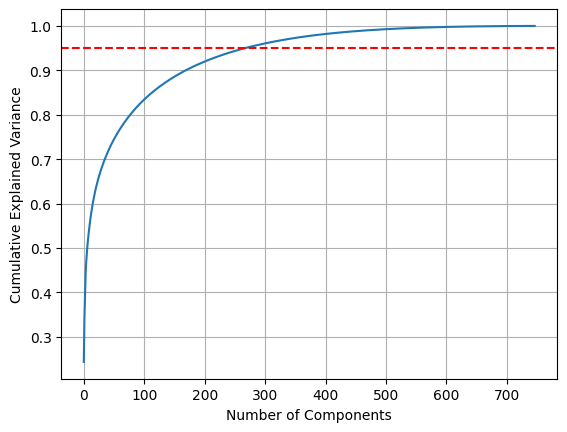

In [ ]:
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = X_train#mydf.iloc[:, 4:]
y = y_train#mydf.iloc[:, :4]
pca = PCA()
X_pca = pca.fit_transform(features)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
pca = PCA(n_components=n_components)
#plot
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='red', linestyle='--')
plt.show()



In [ ]:
pca = PCA(n_components =373).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
y2_test.shape

(321,)

Clearly, thoroughly addresses ALL FOUR of the following:
1. Predictive models that the team used.
2. Tuning procedure IF the model has tunable parameters.
3. Model performance, with resampling results (i.e., 10-fold cross- validation with 5 repeats) and/or a testing data set (e.g., Kaggle test data). For regression problems, report RMSE and R^2 and SDs for the two metrics from resampling procedures. For classification problems, shows ROC curves and other metrics the team deems important.
4. Predictors deemed important and whether these predictors agree with what a human expert would believe as important (if this is possible to discuss).

## Modeling

In [ ]:
def smape(y_true, y_pred):
    smap = np.zeros(len(y_true))

    num = np.abs(y_true - y_pred)
    dem = ((np.abs(y_true) + np.abs(y_pred)) / 2)

    pos_ind = (y_true!=0)|(y_pred!=0)
    smap[pos_ind] = num[pos_ind] / dem[pos_ind]

    return 100 * np.mean(smap)
def sd(y_true, y_pred):
  return np.std(y_pred)

smape_score = make_scorer(smape, greater_is_better=False)
scoring = {'r2':'r2', 'smape':smape_score, 'rmse':'neg_root_mean_squared_error'}

Extra Trees Regression

In [ ]:
# Parameter tuning

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd

# Define the parameter grid for grid search cross-validation
param_grid = {
    'n_estimators': [300, 500,700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Extra Trees Regression model
model = ExtraTreesRegressor(random_state=42)

# Perform grid search cross-validation to find the best set of hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the testing data using the best set of hyperparameters
y_pred = grid_search.predict(X_test)

KeyboardInterrupt: ignored

In [ ]:
# Create data frames to save performance scores
df_R2 = pd.DataFrame(columns=['R2'])
df_SMAPE = pd.DataFrame(columns=['SMAPE'])
df_MSE = pd.DataFrame(columns=['MSE'])

In [ ]:
def extra_trees(y_train,y_test,var,allimps):
    # Create the Extra Trees Regression model
    model = ExtraTreesRegressor(n_estimators=1000,min_samples_leaf=2,max_features='auto',min_samples_split=5, random_state=42)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate the mean squared error of the predictions
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the mean squared error
    print(f'SMAPE: {smape(y_test.values,y_pred)}')
    print("Mean Squared Error: ", mse)
    print("R-squared score: {:.2f}".format(r2))
    # Get feature importances from the model
    importances = model.feature_importances_
    if var == 'updrs_1':
        allimps.loc[0]=importances
    else:
        allimps.loc[0] = allimps.loc[0] + importances

    # Sort the feature importances in descending order
    indices = importances.argsort()[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    print(var)
    for f in range(10):
        print(f"{f+1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")
        print(indices[f])

    df_R2.loc[var,'R2'] = r2
    df_SMAPE.loc[var,'SMAPE'] = smape(y_test.values,y_pred)
    df_MSE.loc[var,'MSE'] = mse

    # Get the top 10 important features
    indices = np.argsort(importances)[::-1][:10]
    features = X_train.columns[indices[:10]]

    # Plot the feature importances
    plt.title('Extra Trees: Top 10 Important Features for updrs_1')
    plt.bar(range(len(indices)), importances[indices])
    plt.xticks(range(len(indices)), features, rotation=45, ha='right')
    plt.show()

In [ ]:
allimps = pd.DataFrame(columns=X_train.columns)
print('updrs_1')
extra_trees(y_train,y_test,'updrs_1',allimps)
print('updrs_2')
extra_trees(y2_train,y2_test,'updrs_2',allimps)
print('updrs_3')
extra_trees(y3_train,y3_test,'updrs_3',allimps)
print('updrs_4')
extra_trees(y4_train,y4_test,'updrs_4',allimps)

### Ridge

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

ridge_clf_1 = GridSearchCV(Ridge(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y_train.values)

preds = ridge_clf_1.best_estimator_.predict(X_test_pca)
print('Ridge Results - UPDRS 1')
print('-'*30)
print(f'SMAPE: {smape(y_test.values,preds)}')
print(f'R2: {r2_score(y_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y_test.values,preds)}')

Ridge Results - UPDRS 1
------------------------------
SMAPE: 74.56241090905506
R2: 0.055846556850944085
RMSE: 30.779011907506092


In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

ridge_clf_2 = GridSearchCV(Ridge(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y2_train.values)

preds = ridge_clf_2.best_estimator_.predict(X_test_pca)
print('Ridge Results - UPDRS 2')
print('-'*30)
print(f'SMAPE: {smape(y2_test.values,preds)}')
print(f'R2: {r2_score(y2_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y2_test.values,preds)}')

Ridge Results - UPDRS 2
------------------------------
SMAPE: 104.4127464480186
R2: 0.09194230571422934
RMSE: 38.574716677424554


In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

ridge_clf_3 = GridSearchCV(Ridge(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y3_train.values)

preds = ridge_clf_3.best_estimator_.predict(X_test_pca)
print('Ridge Results - UPDRS 3')
print('-'*30)
print(f'SMAPE: {smape(y3_test.values,preds)}')
print(f'R2: {r2_score(y3_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y3_test.values,preds)}')

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

ridge_clf_4 = GridSearchCV(Ridge(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y4_train.values)

preds = ridge_clf_4.best_estimator_.predict(X_test_pca)
print('Ridge Results - UPDRS 4')
print('-'*30)
print(f'SMAPE: {smape(y4_test.values,preds)}')
print(f'R2: {r2_score(y4_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y4_test.values,preds)}')

### Lasso

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

lasso_clf = GridSearchCV(Lasso(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y_train.values)

preds = lasso_clf.best_estimator_.predict(X_test_pca)
print('Lasso Results - UPDRS 1')
print('-'*30)
print(f'SMAPE: {smape(y_test.values,preds)}')
print(f'R2: {r2_score(y_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y_test.values,preds)}')

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

lasso_clf_2 = GridSearchCV(Lasso(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y2_train.values)

preds = lasso_clf_2.best_estimator_.predict(X_test_pca)
print('Lasso Results - UPDRS 2')
print('-'*30)
print(f'SMAPE: {smape(y2_test.values,preds)}')
print(f'R2: {r2_score(y2_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y2_test.values,preds)}')

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

lasso_clf_3 = GridSearchCV(Lasso(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y3_train.values)

preds = lasso_clf_3.best_estimator_.predict(X_test_pca)
print('Lasso Results - UPDRS 3')
print('-'*30)
print(f'SMAPE: {smape(y3_test.values,preds)}')
print(f'R2: {r2_score(y3_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y3_test.values,preds)}')

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

lasso_clf_4 = GridSearchCV(Lasso(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y4_train.values)

preds = lasso_clf_4.best_estimator_.predict(X_test_pca)
print('Lasso Results - UPDRS 4')
print('-'*30)
print(f'SMAPE: {smape(y4_test.values,preds)}')
print(f'R2: {r2_score(y4_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y4_test.values,preds)}')

### Extreme Gradient Boosting

Due to the large dimension size of the data, this takes a while to run. Cross Validation of the below params took over 3 and 1/2 hours and still didn't finish. Hence, I'm just running the default.

In [ ]:
params = {
    'max_depth' : [2, 5, 10, 20, 100],
    'n_estimators' : [100, 200, 500],
    'reg_alpha' : [0, 0.1, 1, 5, 10],
    'reg_lambda' : [0, 0.1, 1, 5, 10],
    'gamma' : [0.1, 0.1, 1]
}

#xgb_clf = GridSearchCV(XGBRegressor(), params,
#                        scoring = scoring,
#                        cv=5,
#                        refit='smape'
#                        ).fit(X_train.values, y_train.values)

#preds = xgb_clf.best_estimator_.predict(X_test.values)
xgb_clf = XGBRegressor().fit(X_train_pca, y_train.values)
preds = xgb_clf.predict(X_test_pca)
print('XGB Results - UPDRS 1')
print('-'*30)
print(f'SMAPE: {smape(y_test.values,preds)}')
print(f'R2: {r2_score(y_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y_test.values,preds)}')

In [ ]:
xgb_clf_2 = XGBRegressor().fit(X_train_pca, y2_train.values)
preds = xgb_clf_2.predict(X_test_pca)
print('XGB Results - UPDRS 2')
print('-'*30)
print(f'SMAPE: {smape(y2_test.values,preds)}')
print(f'R2: {r2_score(y2_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y2_test.values,preds)}')

In [ ]:
xgb_clf_3 = XGBRegressor().fit(X_train_pca, y3_train.values)
preds = xgb_clf_3.predict(X_test_pca)
print('XGB Results - UPDRS 3')
print('-'*30)
print(f'SMAPE: {smape(y3_test.values,preds)}')
print(f'R2: {r2_score(y3_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y3_test.values,preds)}')

In [ ]:
xgb_clf_4 = XGBRegressor().fit(X_train_pca, y4_train.values)
preds = xgb_clf_4.predict(X_test_pca)
print('XGB Results - UPDRS 4')
print('-'*30)
print(f'SMAPE: {smape(y4_test.values,preds)}')
print(f'R2: {r2_score(y4_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y4_test.values,preds)}')

### Random Forest Regression

In [ ]:
df_rfR2 = pd.DataFrame(columns=['R2'])
df_rfSMAPE = pd.DataFrame(columns=['SMAPE'])
df_rfMSE = pd.DataFrame(columns=['MSE'])

In [ ]:
def rf_trees(y_train,y_test,var,allimps):

    rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

    # Fit the model to the training data
    rf_model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f'SMAPE: {smape(y_test.values,y_pred)}')
    print("Mean squared error: {:.2f}".format(mse))
    print("R-squared score: {:.2f}".format(r2))

    # Get feature importances from the model
    importances = rf_model.feature_importances_
    allimps.loc[0] = allimps.loc[0] + importances

    # Sort the feature importances in descending order
    indices = importances.argsort()[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    print(var)
    for f in range(10):
        print(f"{f+1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")
    df_rfR2.loc[var,'R2'] = r2
    df_rfSMAPE.loc[var,'SMAPE'] = smape(y_test.values,y_pred)
    df_rfMSE.loc[var,'MSE'] = mse


    indices = np.argsort(importances)[::-1][:10]
    features = X_train.columns[indices[:10]]

    # Plot the feature importances
    plt.title('Random Forest: Top 10 Important Features for '+ var)
    plt.bar(range(len(indices)), importances[indices])
    plt.xticks(range(len(indices)), features, rotation=45, ha='right')
    plt.show()

In [ ]:
print('updrs_1')
rf_trees(y_train,y_test,'updrs_1',allimps)
print('updrs_2')
rf_trees(y2_train,y2_test,'updrs_2',allimps)
print('updrs_3')
rf_trees(y3_train,y3_test,'updrs_3',allimps)
print('updrs_4')
rf_trees(y4_train,y4_test,'updrs_4',allimps)

In [ ]:
# Plot combined feature importances

df_melted = allimps.iloc[:,1:15].melt()
df_melted = df_melted.sort_values(by='value', ascending=False).reset_index()
# Sort values in descending order
df_melted = df_melted.sort_values(by='value', ascending=False)

# Reverse order of x-axis tick locations
x = range(len(df_melted))
plt.xticks(x, reversed(df_melted['variable']), rotation=45, ha='left')

# Define color palette
colors = plt.cm.tab20(np.linspace(0, 1, len(df_melted['variable'])))

# Set bar width
width = 0.8

# Plot vertical bar chart with different colors for each bar
for i, row in df_melted.iterrows():
    plt.bar(i, row['value'], align='center', width=width, color=colors[i])

# Set title and axis labels
plt.title('Combined Feature Importances')
plt.xlabel('Feature Names')
plt.ylabel('Importance')

# Show plot
plt.show()

## Models with a column on first month visit updrs values


### Preprocessing

In [ ]:
# Create column mappings for the first month values
i_1 = {}
i_2 = {}
i_3 = {}
i_4 = {}
first_month = {}
for id in df_knn.patient_id.unique():
  df_a = df_knn[(df_knn.patient_id == id)]
  i_1[id] = df_a.updrs_1.values[0]
  i_2[id] = df_a.updrs_2.values[0]
  i_3[id] = df_a.updrs_3.values[0]
  i_4[id] = df_a.updrs_4.values[0]
  first_month[id] = df_a.visit_month.values[0]


#Insert the new columns
df_knn['i_1'] = df_knn['patient_id'].map(i_1)
df_knn['i_2'] = df_knn['patient_id'].map(i_2)
df_knn['i_3'] = df_knn['patient_id'].map(i_3)
df_knn['i_4'] = df_knn['patient_id'].map(i_4)
df_knn['first_month'] = df_knn['patient_id'].map(first_month)
df_knn['current_month'] = df_knn['visit_month']

df_knn

In [ ]:
#Split the data by the patient_id and take the last data point for each as a test
test_indexes = []
for id in df_knn.patient_id.unique():
  test_indexes.append(df_knn[df_knn.patient_id==id].index[-1])

time_test_df = df_knn.iloc[test_indexes]
time_train_df = df_knn.iloc[~df_knn.index.isin(test_indexes)]

X_train = time_train_df.iloc[:,7:]
y1_train = time_train_df.updrs_1
y2_train = time_train_df.updrs_2
y3_train = time_train_df.updrs_3
y4_train = time_train_df.updrs_4

X_test = time_test_df.iloc[:,7:]
y1_test = time_test_df.updrs_1
y2_test = time_test_df.updrs_2
y3_test = time_test_df.updrs_3
y4_test = time_test_df.updrs_4

In [ ]:
scale_cols = X_train.columns
scaler = StandardScaler().fit(X_train)
X_train[scale_cols] = scaler.transform(X_train)
X_test[scale_cols] = scaler.transform(X_test)


In [ ]:
# Dimensionality Reduction using PCA
features = X_train#mydf.iloc[:, 4:]
y = y1_train#mydf.iloc[:, :4]
pca = PCA()
X_pca = pca.fit_transform(features)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
pca = PCA(n_components=n_components)
#plot
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
pca = PCA(n_components = 400).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### Ridge - Time Tested

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

ridge_clf_1 = GridSearchCV(Ridge(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y1_train.values)

preds = ridge_clf_1.best_estimator_.predict(X_test_pca)
print('Ridge Results - UPDRS 1')
print('-'*30)
print(f'SMAPE: {smape(y1_test.values,preds)}')
print(f'R2: {r2_score(y1_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y1_test.values,preds)}')

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

ridge_clf_2 = GridSearchCV(Ridge(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y2_train.values)

preds = ridge_clf_2.best_estimator_.predict(X_test_pca)
print('Ridge Results - UPDRS 2')
print('-'*30)
print(f'SMAPE: {smape(y2_test.values,preds)}')
print(f'R2: {r2_score(y2_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y2_test.values,preds)}')

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

ridge_clf_3 = GridSearchCV(Ridge(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y3_train.values)

preds = ridge_clf_3.best_estimator_.predict(X_test_pca)
print('Ridge Results - UPDRS 3')
print('-'*30)
print(f'SMAPE: {smape(y3_test.values,preds)}')
print(f'R2: {r2_score(y3_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y3_test.values,preds)}')

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

ridge_clf_4 = GridSearchCV(Ridge(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y4_train.values)

preds = ridge_clf_4.best_estimator_.predict(X_test_pca)
print('Ridge Results - UPDRS 4')
print('-'*30)
print(f'SMAPE: {smape(y4_test.values,preds)}')
print(f'R2: {r2_score(y4_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y4_test.values,preds)}')

### Lasso - Time Tested

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

lasso_clf = GridSearchCV(Lasso(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y1_train.values)

preds = lasso_clf.best_estimator_.predict(X_test_pca)
print('Lasso Results - UPDRS 1')
print('-'*30)
print(f'SMAPE: {smape(y1_test.values,preds)}')
print(f'R2: {r2_score(y1_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y1_test.values,preds)}')

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

lasso_clf_2 = GridSearchCV(Lasso(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y2_train.values)

preds = lasso_clf_2.best_estimator_.predict(X_test_pca)
print('Lasso Results - UPDRS 2')
print('-'*30)
print(f'SMAPE: {smape(y2_test.values,preds)}')
print(f'R2: {r2_score(y2_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y2_test.values,preds)}')

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

lasso_clf_3 = GridSearchCV(Lasso(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y3_train.values)

preds = lasso_clf_3.best_estimator_.predict(X_test_pca)
print('Lasso Results - UPDRS 3')
print('-'*30)
print(f'SMAPE: {smape(y3_test.values,preds)}')
print(f'R2: {r2_score(y3_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y3_test.values,preds)}')

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100]
}

lasso_clf_4 = GridSearchCV(Lasso(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y4_train.values)

preds = lasso_clf_4.best_estimator_.predict(X_test_pca)
print('Lasso Results - UPDRS 4')
print('-'*30)
print(f'SMAPE: {smape(y4_test.values,preds)}')
print(f'R2: {r2_score(y4_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y4_test.values,preds)}')

### Extreme Gradient Boosting - Time Tested

In [ ]:
xgb_clf = XGBRegressor().fit(X_train_pca, y1_train.values)
preds = xgb_clf.predict(X_test_pca)
print('XGB Results - UPDRS 1')
print('-'*30)
print(f'SMAPE: {smape(y1_test.values,preds)}')
print(f'R2: {r2_score(y1_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y1_test.values,preds)}')

In [ ]:
xgb_clf_2 = XGBRegressor().fit(X_train_pca, y2_train.values)
preds = xgb_clf_2.predict(X_test_pca)
print('XGB Results - UPDRS 2')
print('-'*30)
print(f'SMAPE: {smape(y2_test.values,preds)}')
print(f'R2: {r2_score(y2_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y2_test.values,preds)}')

In [ ]:
xgb_clf_3 = XGBRegressor().fit(X_train_pca, y3_train.values)
preds = xgb_clf_3.predict(X_test_pca)
print('XGB Results - UPDRS 3')
print('-'*30)
print(f'SMAPE: {smape(y3_test.values,preds)}')
print(f'R2: {r2_score(y3_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y3_test.values,preds)}')

In [ ]:
xgb_clf_4 = XGBRegressor().fit(X_train_pca, y4_train.values)
preds = xgb_clf_4.predict(X_test_pca)
print('XGB Results - UPDRS 4')
print('-'*30)
print(f'SMAPE: {smape(y4_test.values,preds)}')
print(f'R2: {r2_score(y4_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y4_test.values,preds)}')

### Random Forest - Time Tested

In [ ]:
rf_clf = RandomForestRegressor().fit(X_train_pca, y1_train.values)
preds = rf_clf.predict(X_test_pca)
print('Random Forest Regression Results - UPDRS 1')
print('-'*30)
print(f'SMAPE: {smape(y1_test.values,preds)}')
print(f'R2: {r2_score(y1_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y1_test.values,preds)}')

In [ ]:
rf_clf = RandomForestRegressor().fit(X_train_pca, y2_train.values)
preds = rf_clf.predict(X_test_pca)
print('Random Forest Regression Results - UPDRS 2')
print('-'*30)
print(f'SMAPE: {smape(y2_test.values,preds)}')
print(f'R2: {r2_score(y2_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y2_test.values,preds)}')

In [ ]:
rf_clf = RandomForestRegressor().fit(X_train_pca, y3_train.values)
preds = rf_clf.predict(X_test_pca)
print('Random Forest Regression Results - UPDRS 3')
print('-'*30)
print(f'SMAPE: {smape(y3_test.values,preds)}')
print(f'R2: {r2_score(y3_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y3_test.values,preds)}')

In [ ]:
rf_clf = RandomForestRegressor().fit(X_train_pca, y4_train.values)
preds = rf_clf.predict(X_test_pca)
print('Random Forest Regression Results - UPDRS 4')
print('-'*30)
print(f'SMAPE: {smape(y4_test.values,preds)}')
print(f'R2: {r2_score(y4_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y4_test.values,preds)}')

### Other Linear Models - Time Tested

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100],
    'penalty' : ['l2', 'l1', 'elasticnet']
}

ridge_clf_1 = GridSearchCV(SGDRegressor(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y1_train.values)

preds = ridge_clf_1.best_estimator_.predict(X_test_pca)
print('SGD Results - UPDRS 1')
print('-'*30)
print(f'SMAPE: {smape(y1_test.values,preds)}')
print(f'R2: {r2_score(y1_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y1_test.values,preds)}')

In [ ]:
linear_clf = LinearRegression().fit(X_train_pca,y1_train)
preds = linear_clf.predict(X_test_pca)
print('Linear Results - UPDRS 1')
print('-'*30)
print(f'SMAPE: {smape(y1_test.values,preds)}')
print(f'R2: {r2_score(y1_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y1_test.values,preds)}')

In [ ]:
params = {
    'alpha':[0.1,0.5,1,5,10,100],
    'l1_ratio' : [0.25,0.5,0.75]
}

ridge_clf_1 = GridSearchCV(ElasticNet(), params,
                        scoring = scoring,
                        cv=10,
                        refit='smape'
                        ).fit(X_train_pca, y1_train.values)

preds = ridge_clf_1.best_estimator_.predict(X_test_pca)
print('SGD Results - UPDRS 1')
print('-'*30)
print(f'SMAPE: {smape(y1_test.values,preds)}')
print(f'R2: {r2_score(y1_test.values,preds)}')
print(f'RMSE: {mean_squared_error(y1_test.values,preds)}')